<a href="https://colab.research.google.com/github/yaajnu/ColabNotebooks/blob/master/KaggleTitanic_RegressionModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
timport pandas as pd
train_set=pd.read_csv('train.csv')

In [ ]:
train_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f68666d6358>,
      dtype=object)

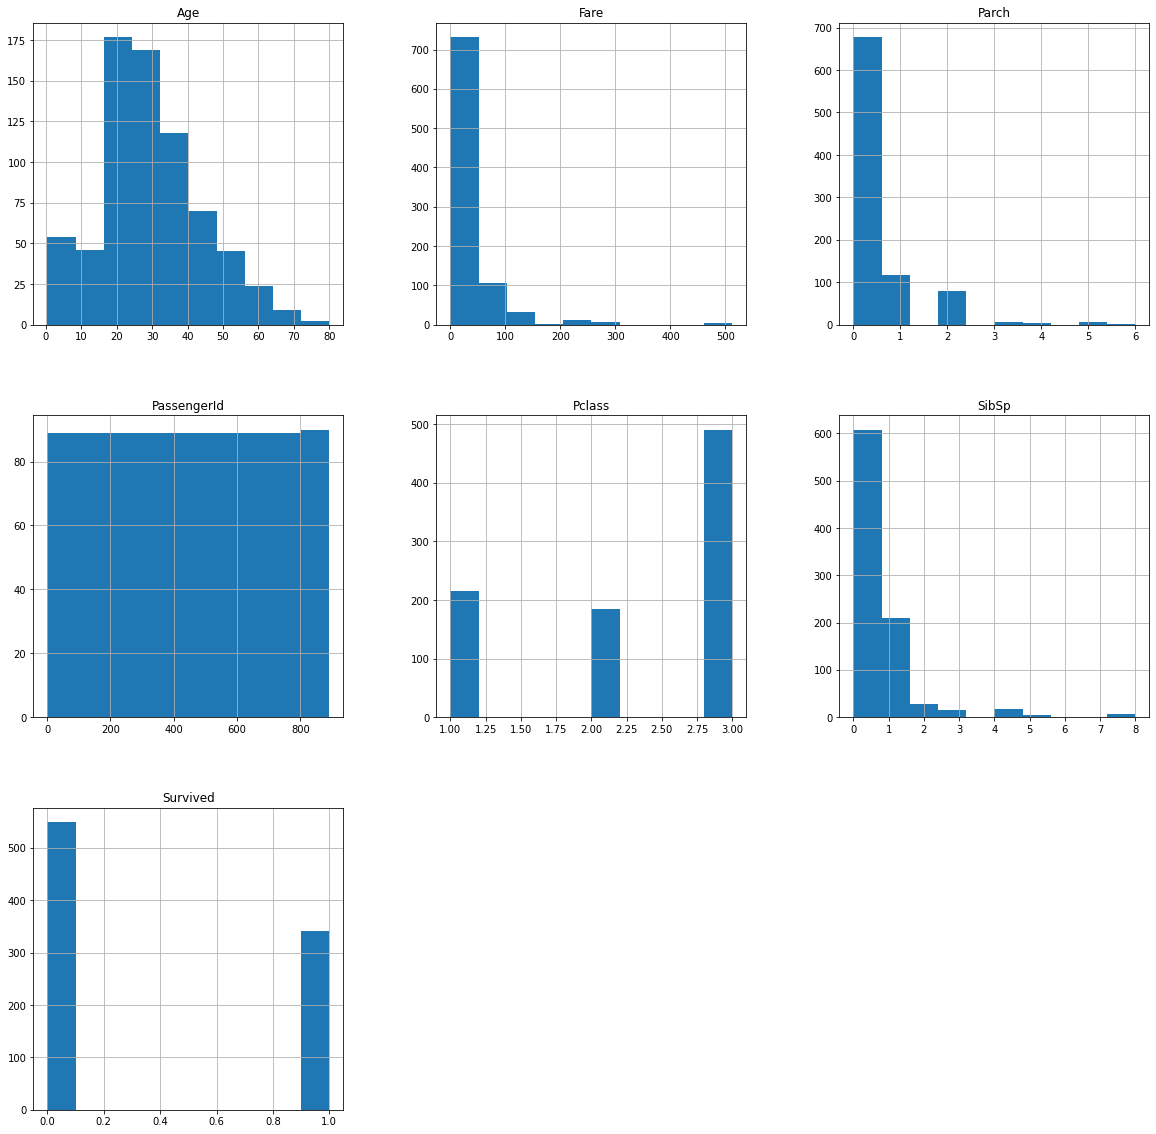

In [ ]:
train_set.hist(figsize=(20,20))

In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train_set['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
corr_relation=train_set.corr()

In [ ]:
corr_relation['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [ ]:
train_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train_set['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [ ]:
train_set.fillna(method='bfill',inplace=True)

In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        890 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train_set_required=train_set.drop(['Name','Ticket','Cabin','Survived','PassengerId'],axis=1)

In [ ]:
train_set_required

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,26.0,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [ ]:
train_set_labels=train_set['Survived'].copy()
train_set_id=train_set['PassengerId'].copy()

In [ ]:
train_set_labels

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
train_set_id

0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder
train_set_sex=train_set[['Sex']]
one_hot=OneHotEncoder()
train_set_1hot=one_hot.fit_transform(train_set_sex)

In [ ]:
train_set_1hot.toarray()

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [ ]:
one_hot.categories_

[array(['female', 'male'], dtype=object)]

In [ ]:
Parch_hot=OneHotEncoder()
a=train_set[['Embarked']]
train_set_Embarked1hot=Parch_hot.fit_transform(a)

In [ ]:
train_set_Embarked1hot.toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [ ]:
Parch_hot.categories_

[array(['C', 'Q', 'S'], dtype=object)]

In [ ]:
train_set_labels=train_set[['PassengerId','Name']]

In [ ]:
train_set['PassengerId']

0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64

In [ ]:
train_set=train_set.drop(['Survived'],axis=1)

In [ ]:
train_set

<bound method DataFrame.reset_index of              Pclass     Sex   Age  SibSp  Parch     Fare Embarked
PassengerId                                                      
1                 3    male  22.0      1      0   7.2500        S
2                 1  female  38.0      1      0  71.2833        C
3                 3  female  26.0      0      0   7.9250        S
4                 1  female  35.0      1      0  53.1000        S
5                 3    male  35.0      0      0   8.0500        S
...             ...     ...   ...    ...    ...      ...      ...
887               2    male  27.0      0      0  13.0000        S
888               1  female  19.0      0      0  30.0000        S
889               3  female  19.0      1      2  23.4500        S
890               1    male  26.0      0      0  30.0000        C
891               3    male  32.0      0      0   7.7500        Q

[891 rows x 7 columns]>

In [ ]:
train_set_required

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,26.0,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [ ]:
from sklearn.compose import ColumnTransformer
hot_attribs=['Sex','Embarked']
full_pipeline=ColumnTransformer([
                                 ("OneHot",OneHotEncoder(sparse=False),hot_attribs)
                                 
],remainder='passthrough')


In [ ]:
transformed_train=full_pipeline.fit_transform(train_set_required)

In [ ]:
transformed_train

array([[ 0.    ,  1.    ,  0.    , ...,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  0.    ,  1.    , ...,  1.    ,  0.    , 71.2833],
       [ 1.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 1.    ,  0.    ,  0.    , ...,  1.    ,  2.    , 23.45  ],
       [ 0.    ,  1.    ,  1.    , ...,  0.    ,  0.    , 30.    ],
       [ 0.    ,  1.    ,  0.    , ...,  0.    ,  0.    ,  7.75  ]])

In [ ]:
transformed_train.shape

(891, 10)

**RANDOMFOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_clf=RandomForestClassifier()


In [ ]:
forest_clf.fit(transformed_train,train_set_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
train_predictions=forest_clf.predict(transformed_train)

In [ ]:
from sklearn.metrics import precision_score,recall_score,confusion_matrix,f1_score,roc_curve,precision_recall_curve
precision_score(train_set_labels,train_predictions)

0.993993993993994

In [ ]:
precisions, recalls, thresholds1 = precision_recall_curve(train_set_labels,
y_scores)

In [ ]:
thresholds

array([2.        , 1.        , 0.99      , 0.98      , 0.97      ,
       0.965     , 0.96      , 0.95      , 0.94      , 0.93      ,
       0.926     , 0.92      , 0.91      , 0.9       , 0.89      ,
       0.886     , 0.88      , 0.87      , 0.86      , 0.85      ,
       0.84      , 0.83916667, 0.82      , 0.81      , 0.8       ,
       0.79      , 0.78      , 0.77      , 0.76875   , 0.76      ,
       0.755     , 0.75      , 0.74      , 0.73      , 0.72      ,
       0.7125    , 0.71      , 0.7       , 0.69666667, 0.69      ,
       0.68      , 0.67416667, 0.67      , 0.66833333, 0.66      ,
       0.65      , 0.64      , 0.635     , 0.62      , 0.61      ,
       0.60408333, 0.6       , 0.59      , 0.58166667, 0.58      ,
       0.57      , 0.56      , 0.55      , 0.54      , 0.52      ,
       0.51      , 0.5       , 0.49      , 0.48      , 0.47388095,
       0.47      , 0.46      , 0.45      , 0.44      , 0.43      ,
       0.42      , 0.415     , 0.41      , 0.4       , 0.39166

In [ ]:
recall_score(train_set_labels,train_predictions)

0.9678362573099415

In [ ]:
confusion_matrix(train_set_labels,train_predictions)

array([[547,   2],
       [ 11, 331]])

In [ ]:
from sklearn.model_selection import cross_val_predict
y_preds=cross_val_predict(forest_clf,transformed_train,train_set_labels,cv=3,method='predict_proba')

In [ ]:
f1_score(train_set_labels,train_predictions)

0.9807407407407408

In [ ]:
y_scores=y_preds[:,1]
fpr_forest,tpr_forest,thresholds=roc_curve(train_set_labels,y_scores)

In [ ]:
thresholds

array([2.        , 1.        , 0.99      , 0.98      , 0.97      ,
       0.965     , 0.96      , 0.95      , 0.94      , 0.93      ,
       0.926     , 0.92      , 0.91      , 0.9       , 0.89      ,
       0.886     , 0.88      , 0.87      , 0.86      , 0.85      ,
       0.84      , 0.83916667, 0.82      , 0.81      , 0.8       ,
       0.79      , 0.78      , 0.77      , 0.76875   , 0.76      ,
       0.755     , 0.75      , 0.74      , 0.73      , 0.72      ,
       0.7125    , 0.71      , 0.7       , 0.69666667, 0.69      ,
       0.68      , 0.67416667, 0.67      , 0.66833333, 0.66      ,
       0.65      , 0.64      , 0.635     , 0.62      , 0.61      ,
       0.60408333, 0.6       , 0.59      , 0.58166667, 0.58      ,
       0.57      , 0.56      , 0.55      , 0.54      , 0.52      ,
       0.51      , 0.5       , 0.49      , 0.48      , 0.47388095,
       0.47      , 0.46      , 0.45      , 0.44      , 0.43      ,
       0.42      , 0.415     , 0.41      , 0.4       , 0.39166

In [ ]:
%matplotlib inline

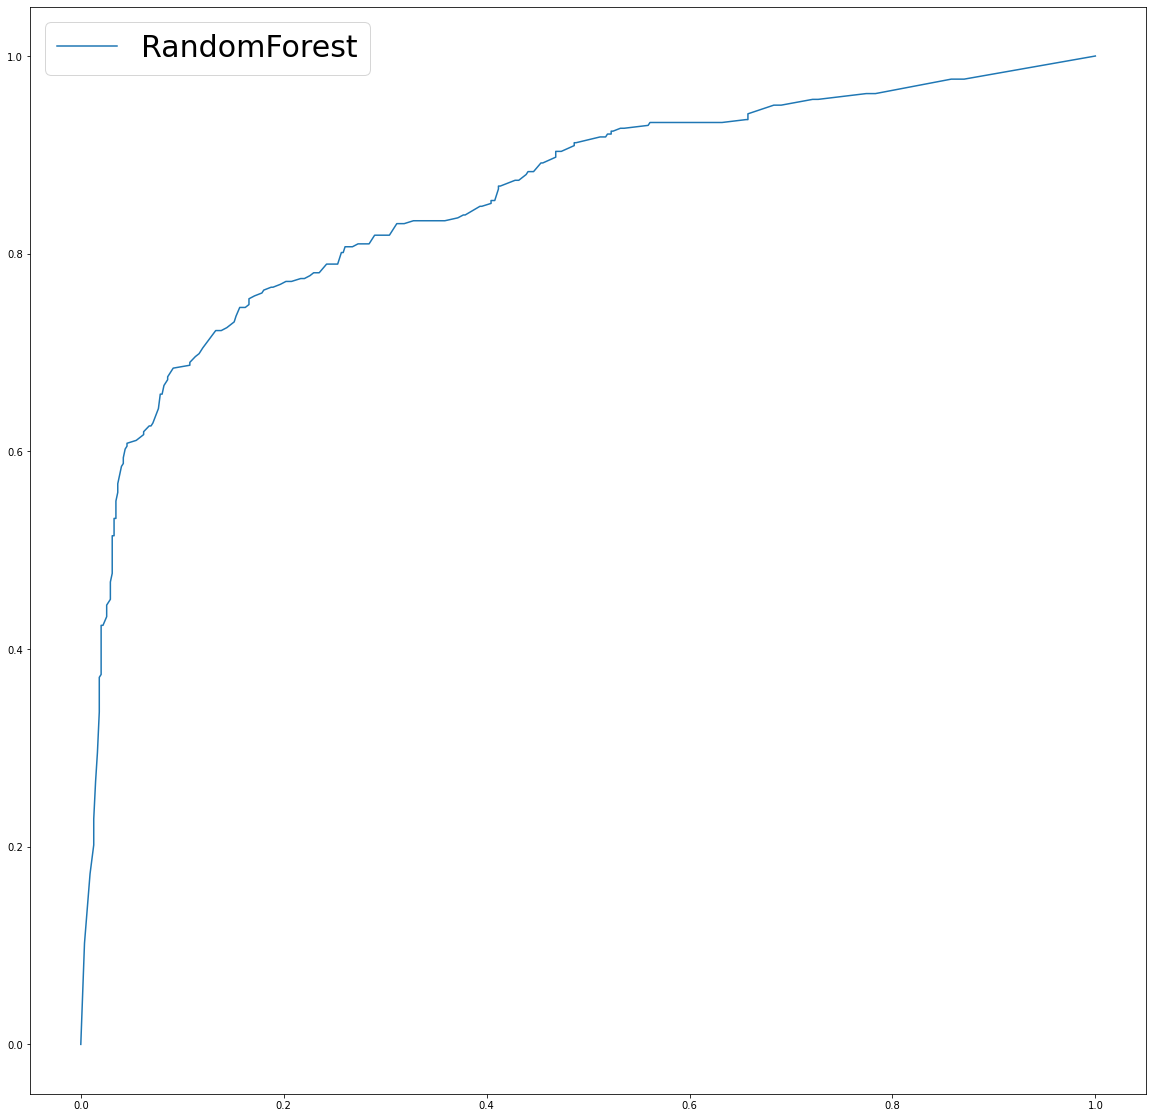

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.plot(fpr_forest,tpr_forest,label='RandomForest')
plt.legend(fontsize=30)

RANDOMFORESTEND


KNEIGHBORSSTART


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn_clf=KNeighborsClassifier(n_neighbors=10)
kn_clf.fit(transformed_train,train_set_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [1,2,3,4,5,6,7,8,9,10]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3)
grid_search.fit(transformed_train,train_set_labels)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] n_neighbors=1, weights=uniform ..................................
[CV] ...... n_neighbors=1, weights=uniform, score=0.642, total=   0.0s
[CV] n_neighbors=1, weights=uniform ..................................
[CV] ...... n_neighbors=1, weights=uniform, score=0.674, total=   0.0s
[CV] n_neighbors=1, weights=uniform ..................................
[CV] ...... n_neighbors=1, weights=uniform, score=0.719, total=   0.0s
[CV] n_neighbors=1, weights=uniform ..................................
[CV] ...... n_neighbors=1, weights=uniform, score=0.702, total=   0.0s
[CV] n_neighbors=1, weights=uniform ..................................
[CV] ...... n_neighbors=1, weights=uniform, score=0.680, total=   0.0s
[CV] n_neighbors=1, weights=distance .................................
[CV] ..... n_neighbors=1, weights=distance, score=0.642, total=   0.0s
[CV] n_neighbors=1, weights=distance .................................
[CV] ..... n_ne

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ...... n_neighbors=4, weights=uniform, score=0.659, total=   0.0s
[CV] n_neighbors=4, weights=uniform ..................................
[CV] ...... n_neighbors=4, weights=uniform, score=0.702, total=   0.0s
[CV] n_neighbors=4, weights=uniform ..................................
[CV] ...... n_neighbors=4, weights=uniform, score=0.691, total=   0.0s
[CV] n_neighbors=4, weights=uniform ..................................
[CV] ...... n_neighbors=4, weights=uniform, score=0.685, total=   0.0s
[CV] n_neighbors=4, weights=uniform ..................................
[CV] ...... n_neighbors=4, weights=uniform, score=0.691, total=   0.0s
[CV] n_neighbors=4, weights=distance .................................
[CV] ..... n_neighbors=4, weights=distance, score=0.665, total=   0.0s
[CV] n_neighbors=4, weights=distance .................................
[CV] ..... n_neighbors=4, weights=distance, score=0.685, total=   0.0s
[CV] n_neighbors=4, weights=distance .................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'weights': ['uniform', 'distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
confusion_matrix(train_set_labels,x)

array([[453,  96],
       [177, 165]])

In [ ]:
x=cross_val_predict(grid_search,transformed_train,train_set_labels,cv=3)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] n_neighbors=1, weights=uniform ..................................
[CV] ...... n_neighbors=1, weights=uniform, score=0.681, total=   0.0s
[CV] n_neighbors=1, weights=uniform ..................................
[CV] ...... n_neighbors=1, weights=uniform, score=0.681, total=   0.0s
[CV] n_neighbors=1, weights=uniform ..................................
[CV] ...... n_neighbors=1, weights=uniform, score=0.681, total=   0.0s
[CV] n_neighbors=1, weights=uniform ..................................
[CV] ...... n_neighbors=1, weights=uniform, score=0.664, total=   0.0s
[CV] n_neighbors=1, weights=uniform ..................................
[CV] ...... n_neighbors=1, weights=uniform, score=0.712, total=   0.0s
[CV] n_neighbors=1, weights=distance .................................
[CV] ..... n_neighbors=1, weights=distance, score=0.681, total=   0.0s
[CV] n_neighbors=1, weights=distance .................................
[CV] ..... n_ne

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..... n_neighbors=4, weights=distance, score=0.672, total=   0.0s
[CV] n_neighbors=4, weights=distance .................................
[CV] ..... n_neighbors=4, weights=distance, score=0.731, total=   0.0s
[CV] n_neighbors=4, weights=distance .................................
[CV] ..... n_neighbors=4, weights=distance, score=0.731, total=   0.0s
[CV] n_neighbors=4, weights=distance .................................
[CV] ..... n_neighbors=4, weights=distance, score=0.697, total=   0.0s
[CV] n_neighbors=4, weights=distance .................................
[CV] ..... n_neighbors=4, weights=distance, score=0.703, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ...... n_neighbors=5, weights=uniform, score=0.681, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ...... n_neighbors=5, weights=uniform, score=0.714, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..... n_neighbors=1, weights=distance, score=0.681, total=   0.0s
[CV] n_neighbors=1, weights=distance .................................
[CV] ..... n_neighbors=1, weights=distance, score=0.681, total=   0.0s
[CV] n_neighbors=1, weights=distance .................................
[CV] ..... n_neighbors=1, weights=distance, score=0.737, total=   0.0s
[CV] n_neighbors=2, weights=uniform ..................................
[CV] ...... n_neighbors=2, weights=uniform, score=0.613, total=   0.0s
[CV] n_neighbors=2, weights=uniform ..................................
[CV] ...... n_neighbors=2, weights=uniform, score=0.630, total=   0.0s
[CV] n_neighbors=2, weights=uniform ..................................
[CV] ...... n_neighbors=2, weights=uniform, score=0.672, total=   0.0s
[CV] n_neighbors=2, weights=uniform ..................................
[CV] ...... n_neighbors=2, weights=uniform, score=0.672, total=   0.0s
[CV] n_neighbors=2, weights=uniform ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..... n_neighbors=2, weights=distance, score=0.695, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ...... n_neighbors=3, weights=uniform, score=0.630, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ...... n_neighbors=3, weights=uniform, score=0.655, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ...... n_neighbors=3, weights=uniform, score=0.613, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ...... n_neighbors=3, weights=uniform, score=0.630, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ...... n_neighbors=3, weights=uniform, score=0.720, total=   0.0s
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.613, total=   0.0s
[CV] n_neighbors=3, weights=distance .................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


KNEIGHBORSEND

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(transformed_train, train_set_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
some_data=train_set_required.iloc[5:10]
some_labels=train_set_labels.iloc[5:10]

In [ ]:
some_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,3,male,54.0,0,0,8.4583,Q
6,1,male,54.0,0,0,51.8625,S
7,3,male,2.0,3,1,21.0750,S
8,3,female,27.0,0,2,11.1333,S
9,2,female,14.0,1,0,30.0708,C


In [ ]:
some_labels

5    0
6    0
7    0
8    1
9    1
Name: Survived, dtype: int64

In [ ]:
some_data_prepared=full_pipeline.fit_transform(some_data)

In [ ]:
linear_predictions=lin_reg.predict(some_data_prepared)

In [ ]:
linear_predictions

array([0.04871618, 0.32480611, 0.08921362, 0.58459246, 0.86999887])

In [ ]:
list(some_labels)

[0, 0, 0, 1, 1]

In [ ]:
import numpy as np



In [ ]:
from sklearn.metrics import mean_squared_error
predictions=lin_reg.predict(transformed_train)
lin_mse=mean_squared_error(train_set_labels,predictions)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

0.3787105673744327

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor()
tree_reg.fit(transformed_train,train_set_labels)
predictions=tree_reg.predict(transformed_train)
lin_mse=mean_squared_error(train_set_labels,predictions)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

0.08757445659016803

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_reg=RandomForestClassifier()
forest_reg.fit(transformed_train,train_set_labels)
forest_predictions=forest_reg.predict(transformed_train)
forest_mse=mean_squared_error(train_set_labels,forest_predictions)
forest_rmse=np.sqrt(forest_mse)
forest_rmse

0.12079051255657977

In [ ]:
forest_predictions

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [ ]:
from scipy.stats import uniform, truncnorm, randint
from sklearn.model_selection import RandomizedSearchCV
model_params = {
    # randomly sample numbers from 4 to 204 estimators
    'n_estimators': randint(4,200),
    # normally distributed max_features, with mean .25 stddev 0.1, bounded between 0 and 1
    'max_features': truncnorm(a=0, b=1, loc=0.25, scale=0.1),
    # uniform distribution from 0.01 to 0.2 (0.01 + 0.199)
    'min_samples_split': uniform(0.01, 0.199)
}

randomsearch=RandomizedSearchCV(forest_reg,param_distributions=model_params,n_iter=50,cv=5,scoring='neg_mean_squared_error',return_train_score=True)

In [ ]:
randomsearch.fit(transformed_train,train_set_labels)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
final_model=randomsearch.best_estimator_


In [ ]:
x=(forest_predictions>0.5).astype(int)

In [ ]:
x

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [ ]:
df=pd.DataFrame(x,index=train_set['PassengerId'])

In [ ]:
df=df.rename(columns={0:'Survived'})

In [ ]:
df.to_csv('KaggleSols1.csv')

In [ ]:
df

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0
...,...
887,0
888,1
889,0


In [ ]:
test_set=pd.read_csv('test.csv')

In [ ]:
labels=test_set['PassengerId']

In [ ]:
test_set=test_set.drop(['Name','Ticket','Cabin'],axis=1)

In [ ]:
test_set=test_set.drop(['PassengerId'],axis=1)

In [ ]:
train_set_required

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,26.0,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [ ]:
test_set.fillna(method='ffill',inplace=True)

In [ ]:
transformed_test=full_pipeline.transform(test_set)
final_predictions=forest_clf.predict(transformed_test)

In [ ]:
final_predictions.shape

(418,)

In [ ]:
final=(final_predictions>0.5).astype(int)

In [ ]:
final

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
df=pd.DataFrame(final,index=labels)

In [ ]:
df.rename(columns={0:'Survived'},inplace=True)

In [ ]:
df

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0


In [ ]:
df.to_csv('Linregsols.csv')

In [ ]:
submission=pd.read_csv('gender_submission.csv')
submission1=pd.DataFrame()
submission1['PassengerId']=submission['PassengerId']
submission1['Survived']=final_predictions
submission1

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
submission.to_csv('submission2.csv',index=False)

In [ ]:
final

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
randomsearch.best_estimator_.feature_importances_

array([0.19747345, 0.22259019, 0.01343858, 0.00729068, 0.01693933,
       0.1134717 , 0.15532674, 0.04371191, 0.03612918, 0.19362824])

In [ ]:
randomsearch.best_estimator

KeyError: ignored